# 1

In [1]:
import MyLibrary as ml
def f(x):
    import math
    return math.log(x/2)-math.sin(5*x/2)

print('Bisection')
print(ml.bisection(f,1.5,2.5,0.000001,0.000001,0))
print()
print('Regula-Falsi')
print(ml.regula(f,1.5,2.5,0.000001,0.000001))

Bisection
1.5 3.0 0
2.25 3.0 1
2.25 2.625 2
2.4375 2.625 3
2.53125 2.625 4
2.578125 2.625 5
2.6015625 2.625 6
2.6132812 2.625 7
2.6191406 2.625 8
2.6220703 2.625 9
2.6220703 2.6235352 10
2.6228027 2.6235352 11
2.6228027 2.6231689 12
2.6229858 2.6231689 13
2.6230774 2.6231689 14
2.6231232 2.6231689 15
2.6231232 2.6231461 16
2.6231346 2.6231461 17
2.6231403 2.6231461 18
2.6231403 2.6231432 19
2.6231403 2.6231418 20
2.6231403 2.6231411 21
(2.6231403, 2.6231411, 21)

Regula-Falsi
2.5 11.8017244 0
3.0 2.6492454 1
2.6492454 2.616595 2
2.6492454 2.6232104 3
2.6232104 2.6231405 4
(2.6231405, 2.6231405, 4)


# 2

In [2]:
import math
def f(x):
    return -x-math.cos(x)

def fd(x):
    return -1+math.sin(x)

print('Bisection')
print(ml.bisection(f,-2,1,0.000001,0.000001,0))
print()
print('Regula-Falsi')
print(ml.regula(f,-2,1,0.000001,0.000001))
print()
print('Newton-Raphson')
print(ml.newraph(f,fd,-2,0.000001,0.000001))

Bisection
-2 1 0
-2 -0.5 1
-1.25 -0.5 2
-0.875 -0.5 3
-0.875 -0.6875 4
-0.78125 -0.6875 5
-0.78125 -0.734375 6
-0.7578125 -0.734375 7
-0.7460938 -0.734375 8
-0.7402344 -0.734375 9
-0.7402344 -0.7373047 10
-0.7402344 -0.7387695 11
-0.739502 -0.7387695 12
-0.7391357 -0.7387695 13
-0.7391357 -0.7389526 14
-0.7391357 -0.7390442 15
-0.73909 -0.7390442 16
-0.73909 -0.7390671 17
-0.73909 -0.7390785 18
-0.73909 -0.7390842 19
-0.7390871 -0.7390842 20
-0.7390857 -0.7390842 21
-0.7390857 -0.739085 22
(-0.7390857, -0.739085, 22)

Regula-Falsi
-0.167943 -0.6313127 1
-0.6313127 -0.7242138 2
-0.7242138 -0.7371793 3
-0.7371793 -0.7388435 4
-0.7388435 -0.7390545 5
-0.7390545 -0.7390813 6
-0.7390813 -0.7390846 7
(-0.7390846, -0.7390846, 7)

Newton-Raphson
-0.7390897242053693 -0.7345361688544632
-0.7390851332198145 -0.7390897242053693
-0.7390851332151607 -0.7390851332198145
(-0.7390851332151607, -0.7390851332198145, 3)


# 3

In [3]:
print('solutions=')
ml.laguerre([1,0,-5,0,4], 5)

solutions=
2.000000000032683
1.0000000000350453
-1.00000000023587
-1.9999999998318585


# 4

In [4]:
data= [i.strip().split() for i in open("assign4fit.txt").readlines()] # reading data file
x,y=[],[]
for i in range(len(data)):
    x.append(float(data[i][0])) #xdata
    y.append(float(data[i][1])) #ydata
#print(x,y)

solution [0.5746586674195864, 4.725861442142238, -11.128217777644013, 7.668677622909927]


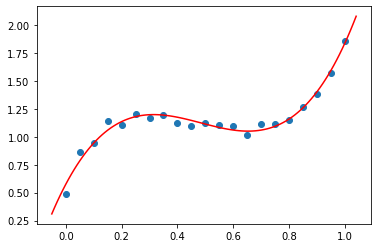

In [5]:
def pol(a,b,c,d,r):
    return a*r**3+b*r**2+c*r+d

# solving to get coefficients
M=ml.polycoeff(x,y,3)
mat=ml.cholesky(M[0]) #M[0] is X, M[1] is Y
mat1=ml.transpose(mat)
sol=ml.chol_bsub(mat1,ml.chol_fsub(mat,M[1]))
print('solution',sol) #sol=bsub(mat1,coeff)

#To plot function
v=[] # h,v are continuous coordinates to plot fit line
h=[x * 0.01 for x in range(-5,5*len(x))]  
for i in range(len(h)):
    j=pol(sol[3],sol[2],sol[1],sol[0],h[i])
    v.append(j)
import matplotlib.pyplot as plt
plt.plot(h,v,'r')
plt.scatter(x,y)